In [17]:
import numpy
import cobra, cobra.test

In [34]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':30, 'ytick.labelsize':30, 'axes.labelsize':40, 'figure.figsize':(12, 8)})

In [19]:
model = cobra.test.create_test_model("textbook")
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In [26]:
wt_solution = model.optimize()
print(wt_solution.objective_value)

0.8739215069684304


In [4]:
len(model.genes)

137

In [5]:
metabolite_of_interest = 'EX_ac_e'
biomass_reaction_label = 'Biomass_Ecoli_core'

In [6]:
def growth_coupled_analysis(task):
    
    """
    This function performs the growth-coupled production.
    It takes as input a list as [first_gene_pair_index, second_gene_pair_index, metabolite_of_interest, biomass_reaction_label]
    It gives as output a list as [first_gene_pair_index, second_gene_pair_index, growth, min_production, max_production]
    """
    
    i = task[0]
    j = task[1]
    metabolite_of_interest = task[2]
    biomass_reaction_label = task[3]
    model = task[4]
    
    with model as model:
                
        # KO
        model.genes[i].knock_out()
        model.genes[j].knock_out()
        solution = model.optimize()
        if solution.status == 'optimal':
            ko_growth = solution.objective_value

            # growth-coupled production
            model.objective = metabolite_of_interest
            model.reactions.get_by_id(biomass_reaction_label).lower_bound = ko_growth
            max_production = model.optimize(objective_sense='maximize').objective_value
            min_production = model.optimize(objective_sense='minimize').objective_value

            #print(i,j)
            #print(model.genes[i], model.genes[j])
            #print('ko_growth', ko_growth)
            #print('productions', min_production, max_production)
            #print()
            result = [i, j, ko_growth, min_production, max_production]
        else:
            #print('unfeasible')
            #print()
            result = [i, j, 0, 0, 0]

    return result

In [16]:
%%time
number_of_genes = len(model.genes)

for i in range(len(model.genes)):
    for j in range(len(model.genes)):
        if i < j:
            
            task = [i, j, metabolite_of_interest, biomass_reaction_label, model]
            result = growth_coupled_analysis(task)
            
            if result[3] > 9:
                print(result)
                print(model.genes[result[0]].name, model.genes[result[1]].name)
                print()            

/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  w

[9, 15, 0.3742298749331096, 13.239874116220834, 14.31226724582913]
lpd atpH

[9, 16, 0.3742298749331093, 13.239874116220724, 14.312267245829142]
lpd atpG

[9, 17, 0.3742298749331092, 13.23987411622072, 14.312267245829142]
lpd atpA

[9, 18, 0.3742298749331092, 13.23987411622072, 14.312267245829144]
lpd atpD

[9, 19, 0.37422987493310944, 13.239874116220841, 14.312267245829126]
lpd atpF

[9, 20, 0.3742298749331094, 13.239874116220832, 14.312267245829132]
lpd atpB

[9, 21, 0.3742298749331094, 13.239874116220836, 14.31226724582913]
lpd atpC

[9, 22, 0.37422987493310944, 13.23987411622084, 14.312267245829124]
lpd atpE



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


[10, 15, 0.37422987493310833, 13.239874116220761, 14.312267245829107]
sucA atpH

[10, 16, 0.37422987493311244, 13.239874116220976, 14.312267245829103]
sucA atpG

[10, 17, 0.37422987493311194, 13.239874116220797, 14.312267245829123]
sucA atpA

[10, 18, 0.374229874933112, 13.239874116220795, 14.312267245829124]
sucA atpD

[10, 19, 0.37422987493311194, 13.239874116220797, 14.312267245829126]
sucA atpF

[10, 20, 0.37422987493311205, 13.239874116220854, 14.312267245829108]
sucA atpB

[10, 21, 0.37422987493311205, 13.239874116220854, 14.31226724582911]
sucA atpC

[10, 22, 0.37422987493311205, 13.239874116220852, 14.31226724582911]
sucA atpE



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


[11, 15, 0.3742298749331114, 13.239874116220921, 14.312267245829107]
sucB atpH

[11, 16, 0.3742298749331096, 13.239874116220808, 14.312267245829133]
sucB atpG

[11, 17, 0.3742298749331097, 13.239874116220808, 14.312267245829133]
sucB atpA

[11, 18, 0.3742298749331097, 13.239874116220808, 14.312267245829135]
sucB atpD

[11, 19, 0.3742298749331098, 13.239874116220824, 14.312267245829139]
sucB atpF

[11, 20, 0.3742298749331097, 13.239874116220815, 14.312267245829139]
sucB atpB

[11, 21, 0.3742298749331097, 13.239874116220811, 14.312267245829139]
sucB atpC

[11, 22, 0.3742298749331098, 13.239874116220822, 14.312267245829133]
sucB atpE



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  w

[15, 77, 0.3742298749331097, 14.312267245829146, 14.312267245829148]
atpH mdh

[15, 126, 0.3742298749331097, 14.312267245829137, 14.312267245829114]
atpH sdhD

[15, 127, 0.37422987493310966, 14.312267245829121, 14.312267245829126]
atpH sdhB

[15, 128, 0.3742298749331097, 14.31226724582913, 14.312267245829107]
atpH sdhC

[15, 129, 0.3742298749331097, 14.312267245829133, 14.31226724582912]
atpH sdhA

[15, 130, 0.3742298749331097, 13.239874116220797, 14.31226724582911]
atpH sucC

[15, 131, 0.3742298749331097, 13.239874116220792, 14.312267245829101]
atpH sucD



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


[16, 77, 0.37422987493310966, 14.31226724582913, 14.312267245829144]
atpG mdh

[16, 126, 0.37422987493310983, 14.31226724582915, 14.312267245829123]
atpG sdhD

[16, 127, 0.3742298749331097, 14.312267245829137, 14.312267245829132]
atpG sdhB

[16, 128, 0.37422987493310966, 14.312267245829124, 14.312267245829133]
atpG sdhC

[16, 129, 0.37422987493310966, 14.312267245829123, 14.312267245829132]
atpG sdhA

[16, 130, 0.37422987493310966, 13.239874116220802, 14.312267245829137]
atpG sucC

[16, 131, 0.3742298749331097, 13.239874116220818, 14.312267245829132]
atpG sucD



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


[17, 77, 0.37422987493311005, 14.312267245829151, 14.312267245829137]
atpA mdh

[17, 126, 0.37422987493311, 14.312267245829124, 14.312267245829108]
atpA sdhD

[17, 127, 0.3742298749331099, 14.312267245829124, 14.312267245829105]
atpA sdhB

[17, 128, 0.37422987493310994, 14.312267245829126, 14.312267245829103]
atpA sdhC

[17, 129, 0.37422987493310983, 14.312267245829137, 14.312267245829128]
atpA sdhA

[17, 130, 0.3742298749331099, 13.239874116220822, 14.312267245829128]
atpA sucC

[17, 131, 0.3742298749331099, 13.23987411622082, 14.312267245829128]
atpA sucD



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


[18, 77, 0.3742298749331097, 14.312267245829123, 14.312267245829124]
atpD mdh

[18, 126, 0.3742298749331097, 14.312267245829094, 14.312267245829124]
atpD sdhD

[18, 127, 0.37422987493311, 14.312267245829146, 14.312267245829105]
atpD sdhB

[18, 128, 0.3742298749331098, 14.312267245829135, 14.312267245829135]
atpD sdhC

[18, 129, 0.3742298749331097, 14.312267245829137, 14.312267245829139]
atpD sdhA

[18, 130, 0.37422987493310966, 13.239874116220813, 14.312267245829144]
atpD sucC

[18, 131, 0.37422987493310966, 13.239874116220811, 14.312267245829139]
atpD sucD



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


[19, 77, 0.37422987493310966, 14.312267245829124, 14.312267245829133]
atpF mdh

[19, 126, 0.3742298749331096, 14.312267245829126, 14.312267245829128]
atpF sdhD

[19, 127, 0.3742298749331096, 14.312267245829128, 14.31226724582913]
atpF sdhB

[19, 128, 0.37422987493310955, 14.312267245829128, 14.31226724582913]
atpF sdhC

[19, 129, 0.37422987493310955, 14.312267245829126, 14.312267245829132]
atpF sdhA

[19, 130, 0.3742298749331095, 13.239874116220795, 14.31226724582913]
atpF sucC

[19, 131, 0.3742298749331095, 13.239874116220795, 14.312267245829126]
atpF sucD



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


[20, 77, 0.3742298749331098, 14.312267245829133, 14.312267245829123]
atpB mdh

[20, 126, 0.3742298749331096, 14.312267245829126, 14.312267245829128]
atpB sdhD

[20, 127, 0.3742298749331096, 14.312267245829128, 14.31226724582913]
atpB sdhB

[20, 128, 0.37422987493310966, 14.312267245829124, 14.312267245829128]
atpB sdhC

[20, 129, 0.3742298749331096, 14.312267245829123, 14.312267245829123]
atpB sdhA

[20, 130, 0.3742298749331096, 13.239874116220804, 14.312267245829124]
atpB sucC

[20, 131, 0.37422987493310955, 13.239874116220811, 14.312267245829123]
atpB sucD



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


[21, 77, 0.37422987493310983, 14.312267245829146, 14.312267245829135]
atpC mdh

[21, 126, 0.3742298749331092, 14.312267245829082, 14.312267245829121]
atpC sdhD

[21, 127, 0.3742298749331093, 14.3122672458291, 14.312267245829098]
atpC sdhB

[21, 128, 0.3742298749331093, 14.3122672458291, 14.312267245829098]
atpC sdhC

[21, 129, 0.3742298749331093, 14.312267245829098, 14.312267245829098]
atpC sdhA

[21, 130, 0.37422987493310933, 13.239874116220783, 14.312267245829098]
atpC sucC

[21, 131, 0.37422987493310933, 13.239874116220777, 14.312267245829133]
atpC sucD



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


[22, 77, 0.37422987493310994, 14.31226724582914, 14.312267245829135]
atpE mdh

[22, 126, 0.3742298749331096, 14.312267245829121, 14.312267245829135]
atpE sdhD

[22, 127, 0.3742298749331095, 14.31226724582912, 14.312267245829128]
atpE sdhB

[22, 128, 0.3742298749331095, 14.312267245829121, 14.312267245829128]
atpE sdhC

[22, 129, 0.37422987493310966, 14.312267245829132, 14.312267245829142]
atpE sdhA

[22, 130, 0.37422987493310983, 13.239874116220827, 14.312267245829121]
atpE sucC

[22, 131, 0.37422987493310983, 13.239874116220822, 14.31226724582911]
atpE sucD



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  w

/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  w

/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  w

/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


[52, 126, 0.617037407656564, 10.621956959731687, 10.621956959731707]
zwf sdhD

[52, 127, 0.617037407656564, 10.621956959731737, 10.621956959731707]
zwf sdhB

[52, 128, 0.6170374076565639, 10.621956959731634, 10.621956959731712]
zwf sdhC

[52, 129, 0.6170374076565637, 10.62195695973164, 10.621956959731705]
zwf sdhA



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  w

[69, 126, 0.6170374076565638, 10.621956959731678, 10.621956959731719]
gnd sdhD

[69, 127, 0.6170374076565639, 10.621956959731666, 10.621956959731715]
gnd sdhB

[69, 128, 0.617037407656564, 10.621956959731708, 10.62195695973171]
gnd sdhC

[69, 129, 0.6170374076565638, 10.62195695973168, 10.621956959731719]
gnd sdhA



/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  w

[109, 126, 0.617037407656564, 10.62195695973163, 10.621956959731708]
pgl sdhD

[109, 127, 0.617037407656564, 10.62195695973163, 10.621956959731717]
pgl sdhB

[109, 128, 0.617037407656564, 10.621956959731639, 10.621956959731726]
pgl sdhC

[109, 129, 0.6170374076565639, 10.621956959731648, 10.621956959731705]
pgl sdhA

CPU times: user 20.2 s, sys: 85 ms, total: 20.3 s
Wall time: 20.3 s


In [15]:
model.genes[result[0]].name

'tktB'

In [32]:
# make the envelop
plotting_wt_biomass = []
wt_production = []

biomass_space = numpy.linspace(0, wt_solution.objective_value, 100)

with model as model:
    model.objective = metabolite_of_interest
    for target in biomass_space:
        model.reactions.get_by_id(biomass_reaction_label).bounds = (target, target)
        solution = model.optimize()
        if solution.status == 'optimal':
            plotting_wt_biomass.append(target); wt_production.append(solution.objective_value)

In [36]:
plotting_ko_biomass = []
max_productions = []
min_productions = []

i=109; j=129

with model as model:
    model.genes[i].knock_out() 
    model.genes[j].knock_out()
    ko_solution = model.optimize()
    
    biomass_space = numpy.linspace(0, ko_solution.objective_value, 100)
    with model as model:
        model.objective = metabolite_of_interest
        for target in biomass_space:
            model.reactions.get_by_id(biomass_reaction_label).lower_bound = target
            max_production = model.optimize(objective_sense='maximize').objective_value
            min_production = model.optimize(objective_sense='minimize').objective_value
            plotting_ko_biomass.append(target); max_productions.append(max_production); min_productions.append(min_production)
        

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


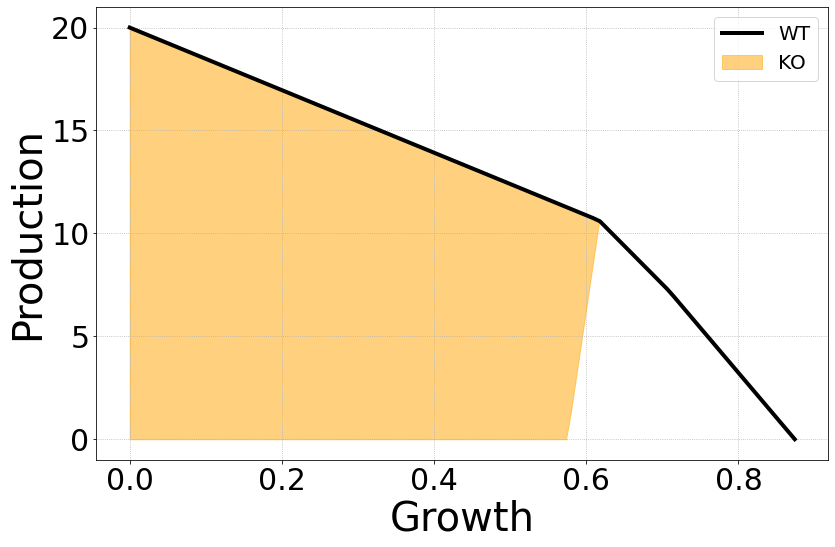

In [41]:
matplotlib.pyplot.plot(plotting_wt_biomass, wt_production, '-', color='black', lw=4, label='WT')
matplotlib.pyplot.fill_between(plotting_ko_biomass, min_productions, max_productions, color='orange', alpha=0.5, label='KO')

matplotlib.pyplot.xlabel('Growth')
matplotlib.pyplot.ylabel('Production')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.legend()

matplotlib.pyplot.tight_layout()

In [ ]:
# run it parallel

